In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("melb_data.csv")

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
housing_data=df.copy()
suburbDict={list(set(housing_data["Suburb"]))[k]:k for k in range(len(set(housing_data["Suburb"])))}
typeDict={list(set(housing_data["Type"]))[k]:k for k in range(len(set(housing_data["Type"])))}
methDict={list(set(housing_data["Method"]))[k]:k for k in range(len(set(housing_data["Method"])))}
sellerDict={list(set(housing_data["SellerG"]))[k]:k for k in range(len(set(housing_data["SellerG"])))}
RegionnameDict={list(set(housing_data["Regionname"]))[k]:k for k in range(len(set(housing_data["Regionname"])))}
CouncilAreaDict={list(set(housing_data["CouncilArea"]))[k]:k for k in range(len(set(housing_data["CouncilArea"])))}
housing_data["Suburb"]=housing_data["Suburb"].apply(lambda x:suburbDict[x])
housing_data["Type"]=housing_data["Type"].apply(lambda x:typeDict[x])
housing_data["Method"]=housing_data["Method"].apply(lambda x:methDict[x])
housing_data["SellerG"]=housing_data["SellerG"].apply(lambda x:sellerDict[x])
housing_data["Regionname"]=housing_data["Regionname"].apply(lambda x:RegionnameDict[x])
housing_data["CouncilArea"]=housing_data["CouncilArea"].apply(lambda x:CouncilAreaDict[x])


In [6]:
YearBuiltAvg=housing_data[housing_data["YearBuilt"].notnull()]["YearBuilt"].mean()
avgBuildingAreaAvg=housing_data[housing_data["BuildingArea"].notnull()]["BuildingArea"].mean()
carAvg=housing_data[housing_data["Car"].notnull()]["Car"].mean()


housing_data=housing_data.fillna(value={"BuildingArea":avgBuildingAreaAvg,"YearBuilt":YearBuiltAvg,"Car":carAvg})

In [7]:
print(typeDict)
print(methDict)

{'t': 0, 'u': 1, 'h': 2}
{'PI': 0, 'SA': 1, 'SP': 2, 'VB': 3, 'S': 4}


In [8]:
housing_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,309,85 Turner St,2,2,1480000.0,4,81,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1964.684217,25,-37.7996,144.9984,0,4019.0
1,309,25 Bloomburg St,2,2,1035000.0,4,81,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,25,-37.8079,144.9934,0,4019.0
2,309,5 Charles St,3,2,1465000.0,2,81,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,25,-37.8093,144.9944,0,4019.0
3,309,40 Federation La,3,2,850000.0,0,81,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1964.684217,25,-37.7969,144.9969,0,4019.0
4,309,55a Park St,4,2,1600000.0,3,6,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.000000,25,-37.8072,144.9941,0,4019.0


In [9]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  int64  
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  int64  
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  int64  
 6   SellerG        13580 non-null  int64  
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    13580 non-null  int64  
 17  Lattitude      13580 non-null  float64
 18  Longti

In [10]:
housing_data=housing_data.drop("Address",axis=1)
housing_data=housing_data.drop("Date",axis=1)
#housing_data=housing_data.drop("Lattitude",axis=1)
#housing_data=housing_data.drop("Longtitude",axis=1)
housing_data=housing_data.astype(np.float64)

TODO: Add Data Analysis

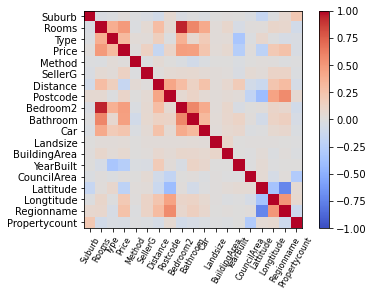

In [11]:
cp=plt.imshow(housing_data.corr(),cmap="coolwarm",norm=mpl.colors.Normalize(vmin=-1.,vmax=1.))
plt.colorbar(cp)
plt.xticks(range(housing_data.select_dtypes(['number']).shape[1]), housing_data.select_dtypes(['number']).columns, fontsize=8, rotation=60)
plt.yticks(range(housing_data.select_dtypes(['number']).shape[1]), housing_data.select_dtypes(['number']).columns, fontsize=10)
plt.show()

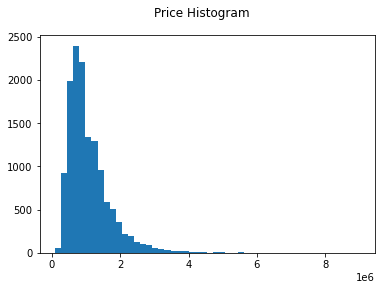

In [12]:
plt.hist(housing_data["Price"],bins=50)
plt.suptitle("Price Histogram")
plt.show()

Try to build a good model

In [14]:
y_train_label=housing_data["Price"]
X_train=housing_data.drop("Price",axis=1)

msk = np.random.rand(len(X_train)) < 0.8

X_trainset = X_train[msk]
y_trainset_label=y_train_label[msk]

X_testset = X_train[~msk]
y_testset_label=y_train_label[~msk]



In [15]:
display(X_trainset.head())
display(X_testset.head())

,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,309.0,2.0,2.0,4.0,81.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,25.0,-37.8079,144.9934,0.0,4019.0
2,309.0,3.0,2.0,2.0,81.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,25.0,-37.8093,144.9944,0.0,4019.0
3,309.0,3.0,2.0,0.0,81.0,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,25.0,-37.7969,144.9969,0.0,4019.0
4,309.0,4.0,2.0,3.0,6.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,25.0,-37.8072,144.9941,0.0,4019.0
5,309.0,2.0,2.0,4.0,237.0,2.5,3067.0,2.0,1.0,0.0,181.0,151.96765,1964.684217,25.0,-37.8041,144.9953,0.0,4019.0


,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,309.0,2.0,2.0,4.0,81.0,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,25.0,-37.7996,144.9984,0.0,4019.0
12,309.0,2.0,1.0,4.0,81.0,2.5,3067.0,2.0,2.0,1.0,0.0,94.00000,2009.000000,25.0,-37.8078,144.9965,0.0,4019.0
14,309.0,1.0,1.0,2.0,141.0,2.5,3067.0,1.0,1.0,1.0,0.0,151.96765,1964.684217,25.0,-37.8016,144.9988,0.0,4019.0
19,309.0,2.0,2.0,4.0,81.0,2.5,3067.0,2.0,1.0,1.0,150.0,73.00000,1985.000000,25.0,-37.8011,145.0004,0.0,4019.0
22,309.0,3.0,1.0,4.0,237.0,2.5,3067.0,3.0,2.0,2.0,4290.0,27.00000,1964.684217,25.0,-37.8078,144.9965,0.0,4019.0
